### 5.7. The Bubble Sort

In [1]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]> alist[i+1]:
                temp =alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp 
                
alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


* The bubble sort makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place. In essence, each item “bubbles” up to the location where it belongs.
*  n-1 times pass, compare times from n-1 for first pass to 1 for last pass

In [3]:
def sortBubbleSort(alist):
    exchange = True
    passnum = len(alist)-1
    while passnum > 0 and  exchange:
        exchange = False 
        for i in range(passnum):
            if alist[i]> alist[i+1]:
                exchange = True
                temp =alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp 
                
alist=[30,40,90,50,60,70,80,100,110,20]
sortBubbleSort(alist)
print(alist)

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


* modify to recognize the sorted list and stop when no exchange happend in a pass.

### 5.8. The Selection Sort

In [4]:
def selectionSort(alist):
    for fillslot in range(len(alist)-1,0,-1): 
        #fillslot start from the last item of the list, 
        #as we assign the found max to the last location of each round of comparison
        indexOfMax = 0
        for index in range(1,fillslot+1):
            if alist[index] > alist[indexOfMax]:
                indexOfMax = index
        temp = alist[fillslot] 
        alist[fillslot] =  alist[indexOfMax]
        alist[indexOfMax] = temp


alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


* due to the reduction in the number of exchanges, the selection sort typically executes faster than bubbleSort. 
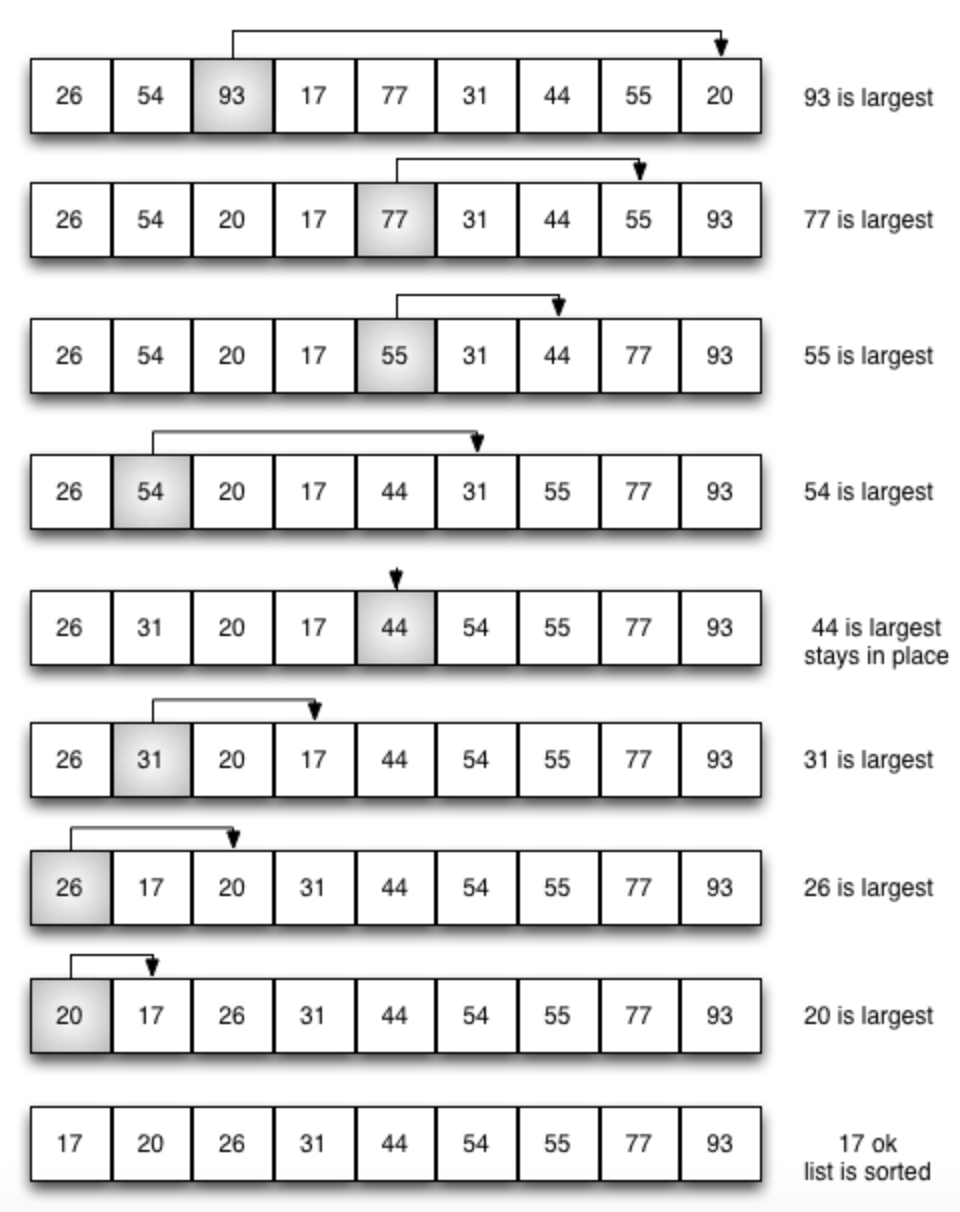

### 5.9. The Insertion Sort
* although still O(n2), works in a slightly different way. It always maintains a sorted sublist in the lower positions of the list. Each new item is then “inserted” back into the previous sublist such that the sorted sublist is one item larger.
* use shift operation, in general a shift operation requires approximately a third of the processing work of an exchange since only one assignment is performed. In benchmark studies, insertion sort will show very good performance.

In [8]:
def insertionSort (alist):
    for index in range(1,len(alist)):
        currentvalue = alist[index]
        position = index
        while position > 0 and alist[position-1] > currentvalue: #shift items to right before finding 
            alist[position] = alist[position-1]                          #the right index to insert the currentvalue 
            position -=1
    
        alist[position] = currentvalue
    
alist = [54,26,93,17,77,31,44,55,20]
insertionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


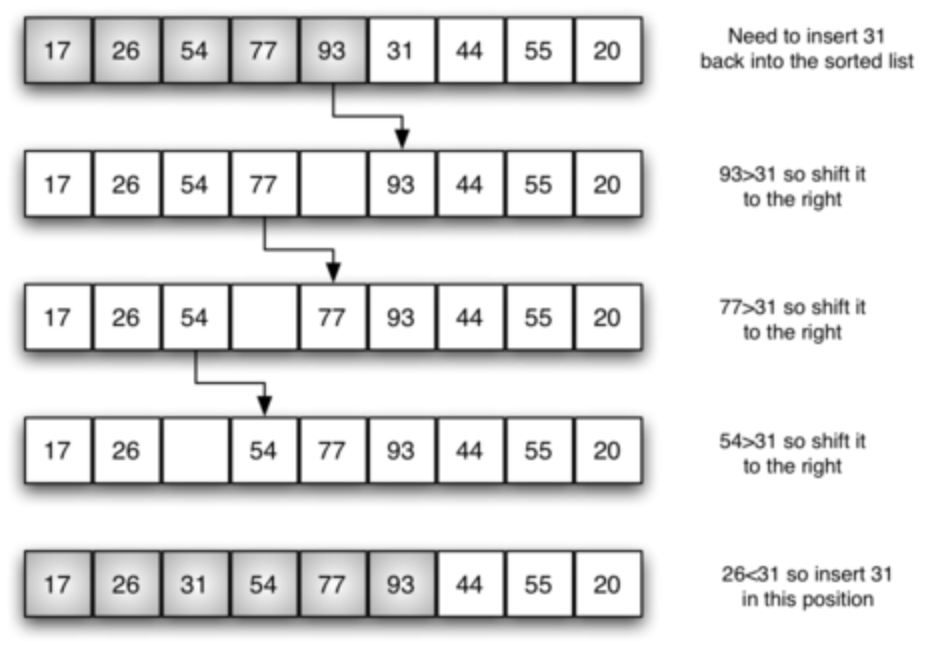

### 5.10. The Shell Sort¶
* skip

### 5.11. The Merge Sort

* the merge operation places the items back into the original list (alist) one at a time by repeatedly taking the smallest item from the sorted lists.

In [11]:
def mergeSort(alist):
    print ("splitting ", alist)
    if len(alist) >1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        
        mergeSort(lefthalf)
        mergeSort(righthalf)

        #shift item in alist for smallest value from first item in both of half lists 
        i= 0 # control index from left to right 
        j= 0 # control index from left to right
        k= 0 # assign smallest value 
        
        while i < len(lefthalf) and j < len(righthalf) :
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i += 1
            else:
                alist[k] = righthalf[j]
                j += 1
            k +=1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i +=1
            k +=1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j +=1
            k +=1

    print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)


splitting  [54, 26, 93, 17, 77, 31, 44, 55, 20]
splitting  [54, 26, 93, 17]
splitting  [54, 26]
splitting  [54]
Merging  [54]
splitting  [26]
Merging  [26]
Merging  [26, 54]
splitting  [93, 17]
splitting  [93]
Merging  [93]
splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
splitting  [77, 31, 44, 55, 20]
splitting  [77, 31]
splitting  [77]
Merging  [77]
splitting  [31]
Merging  [31]
Merging  [31, 77]
splitting  [44, 55, 20]
splitting  [44]
Merging  [44]
splitting  [55, 20]
splitting  [55]
Merging  [55]
splitting  [20]
Merging  [20]
Merging  [20, 55]
Merging  [20, 44, 55]
Merging  [20, 31, 44, 55, 77]
Merging  [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


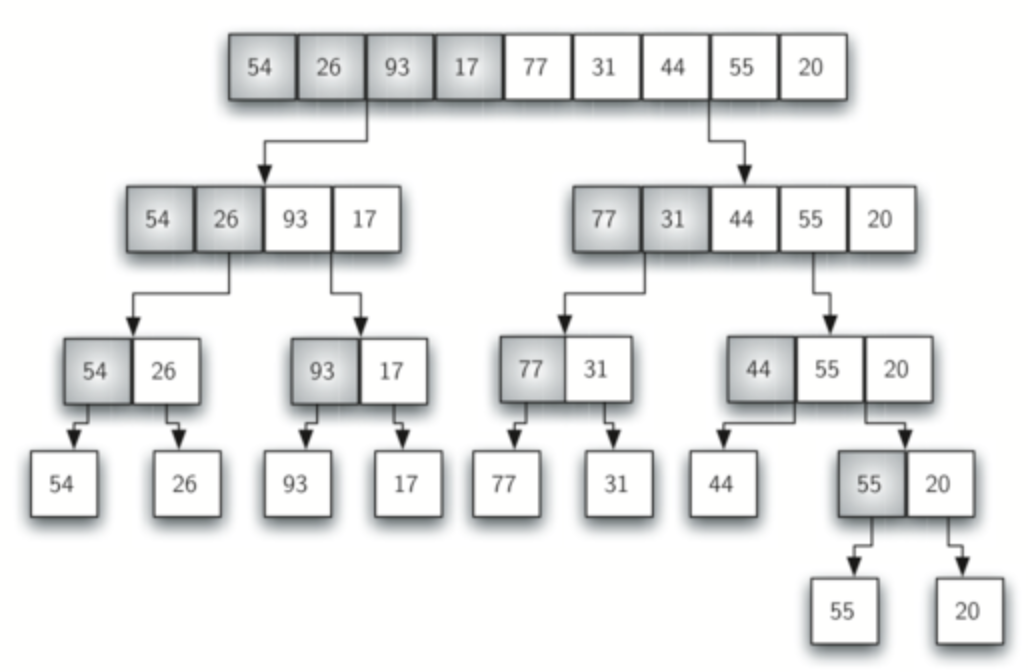

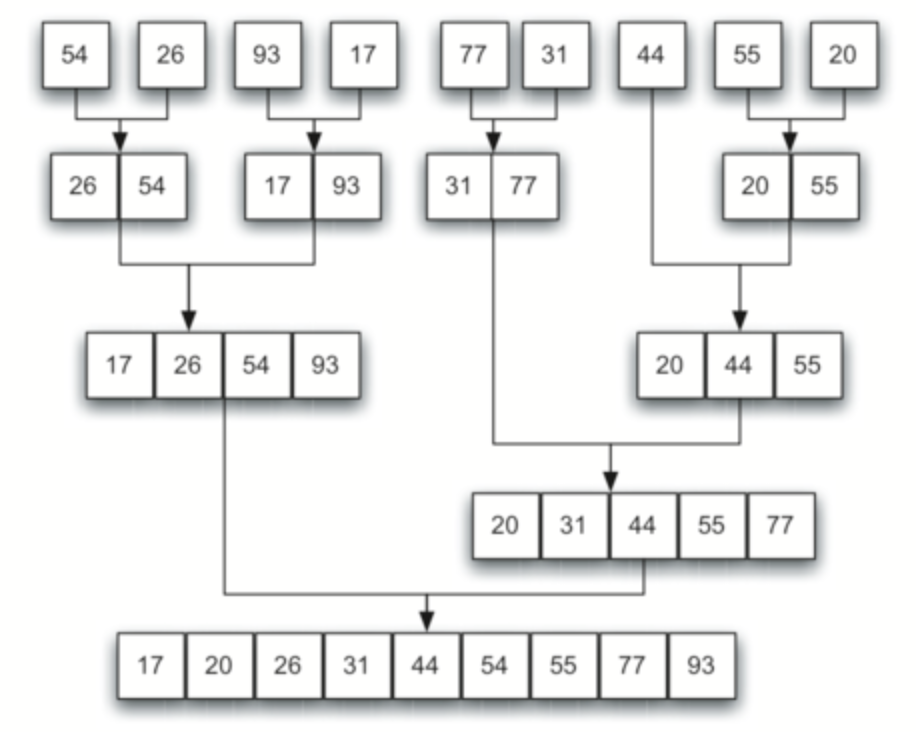

* Slicing operation (split list into halves) : log n
* Merge back operation for each split: n ( compare item for a list of size n)
* Thus, total = n log n 

### 5.12. The Quick Sort
* The quick sort uses divide and conquer to gain the same advantages as the merge sort, while not using additional storage.

In [15]:
def quickSort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist, first, last):
    if first < last:
        splitpoint = partition(alist,first,last)
        
        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)
        
def partition (alist,first,last):
    pivotvalue =alist[first]
    left = first+1
    right = last
    done = False 
    while not done:
        while left <= right and alist[left] <= pivotvalue:
            left+=1
        while left <= right and alist[right] >= pivotvalue:
            right-=1
    
        if right < left:
            done = True
        else:   # switch left and right
            temp = alist[left]   
            alist[left] = alist[right]
            alist[right] = temp
    
    alist[first], alist[right] = alist[right], alist[first]
    return right


alist = [54,26,93,17,77,31,44,55,20]
quickSort(alist)
print(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


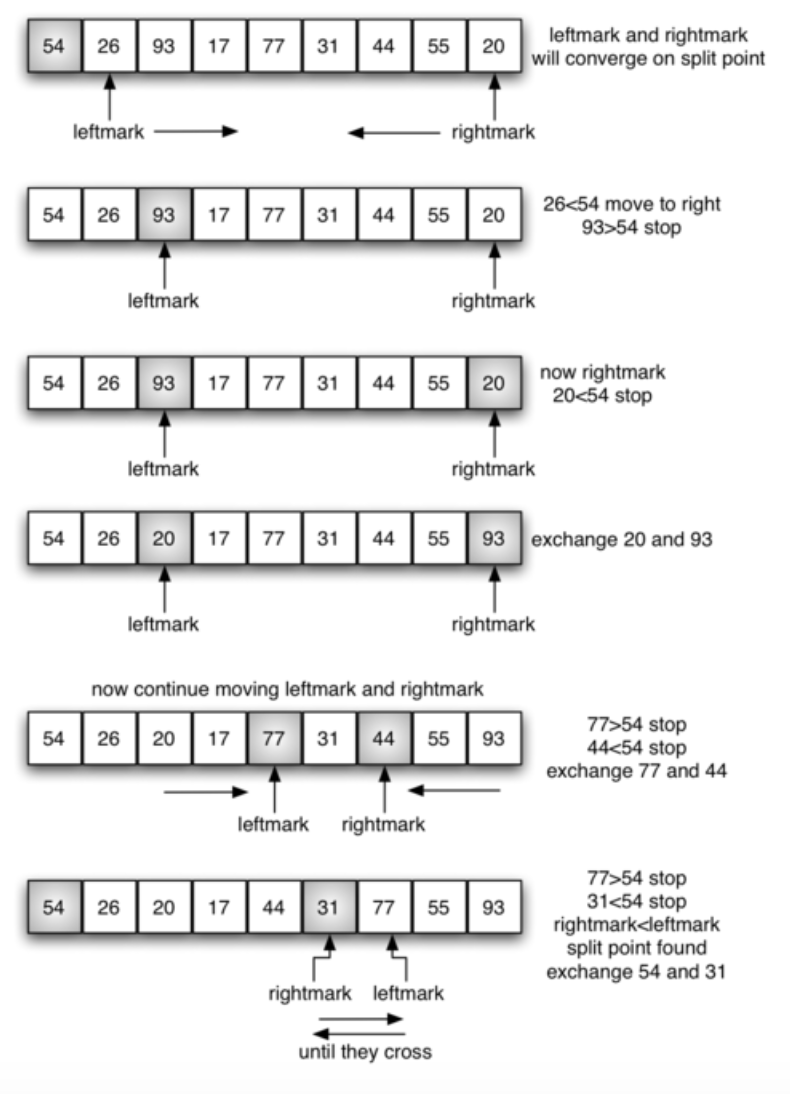

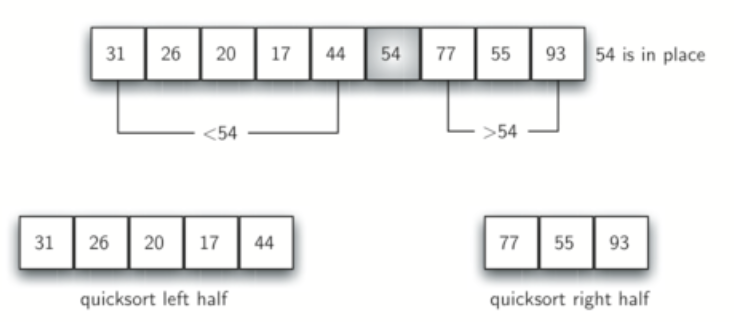

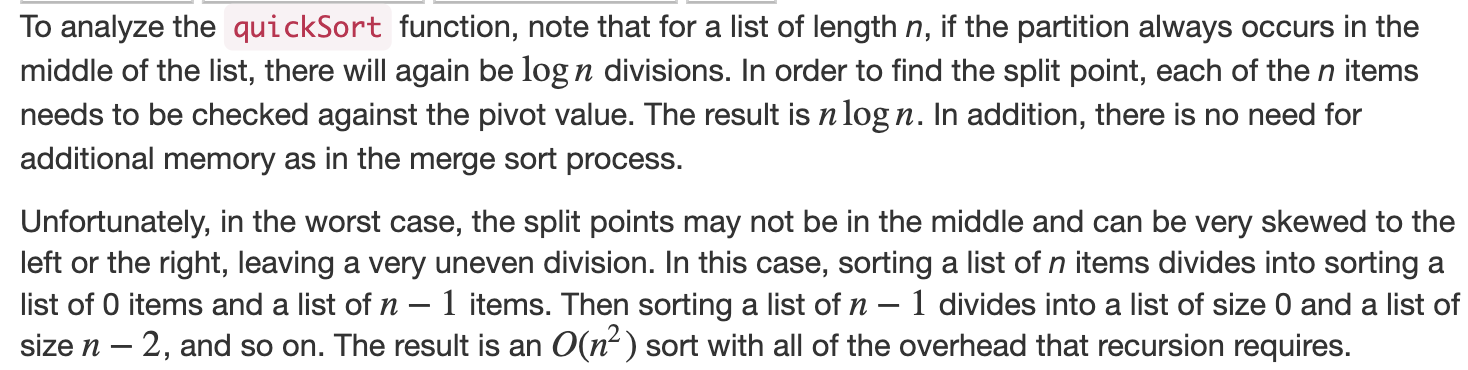

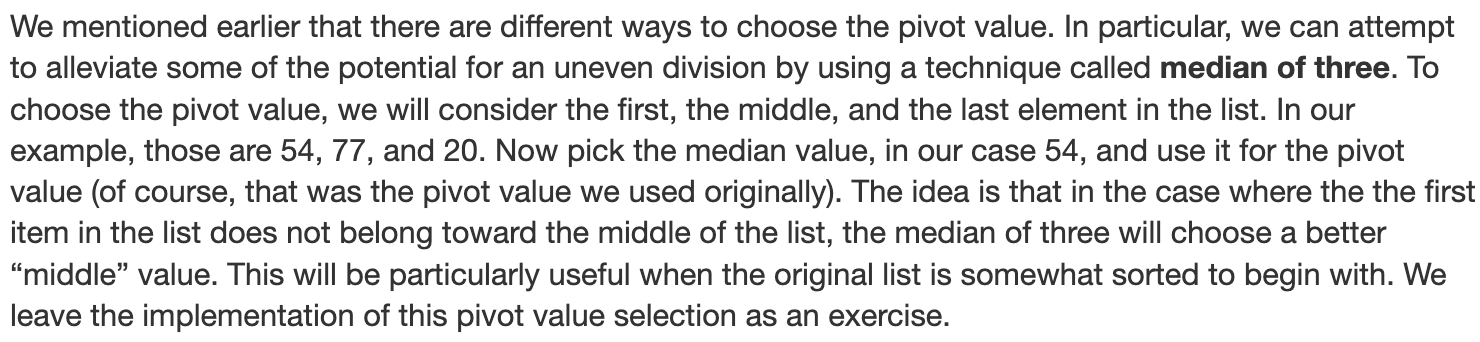